In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cufflinks as cf
import yfinance as yf

In [5]:
start = "2010-01-01"
end = "2020-12-31"
symbol = ["MSFT","GE","AAPL"]
df = yf.download(tickers=symbol, start = start, end = end)

[*********************100%***********************]  3 of 3 completed


In [6]:
cf.set_config_file(offline=True)

In [8]:
df.Close.iplot(fill = True, colorscale="reds", theme="solar")

In [ ]:
cf.colors.scales()
cf.getThemes()

In [21]:
ge=df.swaplevel(axis=1).GE.copy()
ge.loc['5-2017'].iplot(kind="candle")

In [28]:
weekly = ge.resample("W-Fri").ohlc()
weekly = ge.resample("W-Fri", label="right").agg({"Open": "first", "High":"max", "Low":"min", "Close":"last"})

In [29]:
weekly

,Open,High,Low,Close
Date,,,,
2010-01-08,91.394943,100.222183,90.974602,99.681740
2010-01-15,101.062874,101.603317,98.180511,98.720947
2010-01-22,98.180511,100.642525,95.778542,96.739326
2010-01-29,98.841049,100.282234,96.138832,96.559181
2010-02-05,97.279770,102.263855,91.575089,94.817749
...,...,...,...,...
2020-12-04,64.886810,68.259171,62.201405,67.946915
2020-12-11,68.009369,71.756439,67.197502,69.695549
2020-12-18,70.382515,70.882126,66.510536,67.509758


In [30]:
from pandas.tseries.frequencies import to_offset

In [31]:
weekly.index = weekly.index-to_offset("4d")

In [33]:
weekly.loc["5-2017":"9-2017"].iplot(kind="candle")

In [51]:
qf = cf.QuantFig(df=ge.loc["5-2017":"9-2017"], color='green')
qf.add_volume(up_color='green', down_color='red')
# qf.add_sma(5)
# qf.add_sma(20)
qf.add_macd()
qf.add_trendline(date0="2017-05-01", date1 = "2017-09-01")
qf.add_resistance(date="2017-06-12")
qf.iplot(title="GE", name="GE")

In [38]:

dir(qf)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_study',
 '_d',
 '_get_resampled',
 '_get_schema',
 '_get_sliced',
 '_get_study_figure',
 '_get_trendline',
 '_panel_domains',
 'add_adx',
 'add_annotations',
 'add_atr',
 'add_bollinger_bands',
 'add_cci',
 'add_dmi',
 'add_ema',
 'add_macd',
 'add_ptps',
 'add_resistance',
 'add_rsi',
 'add_shapes',
 'add_sma',
 'add_support',
 'add_trendline',
 'add_volume',
 'data',
 'delete',
 'df',
 'figure',
 'iplot',
 'kwargs',
 'layout',
 'panels',
 'studies',
 'theme',
 'trendlines',
 'update']

In [66]:
data = ge.Close.to_frame()
data["returns"] = np.log(data.div(data.shift(1)))
data["creturns"] = data.returns.cumsum().apply(np.exp)
data = data.dropna()

<Axes: xlabel='Date'>

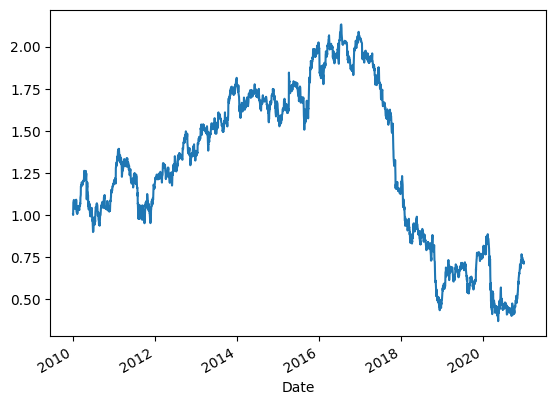

In [68]:
data["creturns"].plot()

In [69]:
#buy and hold
np.exp(data.returns.sum())
data.creturns.iloc[-1] # absolute performance

0.7209320359798976

In [72]:
#annualized mean return and risk
print(data.returns.mean()*252)
print(data.returns.std()*np.sqrt(252))

-0.029800152960658664
0.3159998168874139


1.7618381088827588
2020-05-15 00:00:00


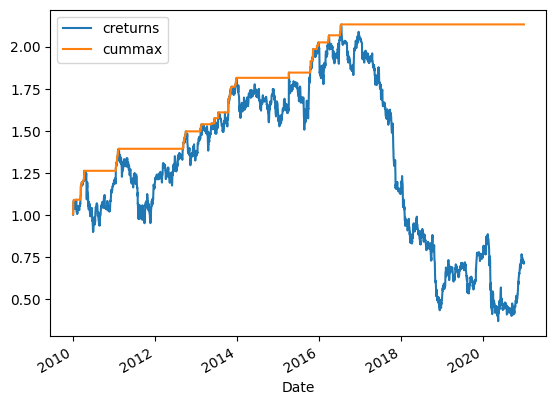

In [77]:
#maximum drawdown
data["cummax"] = data.creturns.cummax()
data[["creturns", "cummax"]].dropna().plot()
drawdown = data["cummax"] - data["creturns"]
print(drawdown.max())
print(drawdown.idxmax())

In [81]:
#SMA crossing strategy
qf = cf.QuantFig(df=ge.loc["2017":"2018"])
qf.add_volume()
qf.add_sma(5)
qf.add_sma(20)
qf.iplot(title="GE", name="GE")

In [107]:
aapl=df.swaplevel(axis=1).AAPL.copy()
data= aapl.loc["2015":"2020"].Close.to_frame()
sma_s = 50
sma_l = 200
data["SMA_S"] = data.Close.rolling(sma_s).mean()
data["SMA_L"] = data.Close.rolling(sma_l).mean()
data.dropna(inplace=True)
data["position"] = np.where(data["SMA_S"]>data["SMA_L"], 1, -1)
data

,Close,SMA_S,SMA_L,position
Date,,,,
2015-10-16,27.760000,28.08690,30.332337,-1
2015-10-19,27.932501,28.06795,30.335337,-1
2015-10-20,28.442499,28.03820,30.344737,-1
2015-10-21,28.440001,28.03955,30.354112,-1
2015-10-22,28.875000,28.04085,30.363800,-1
...,...,...,...,...
2020-12-23,130.960007,119.52140,98.809175,1
2020-12-24,131.970001,119.73700,99.158737,1
2020-12-28,136.690002,120.05660,99.494725,1


<Axes: xlabel='Date'>

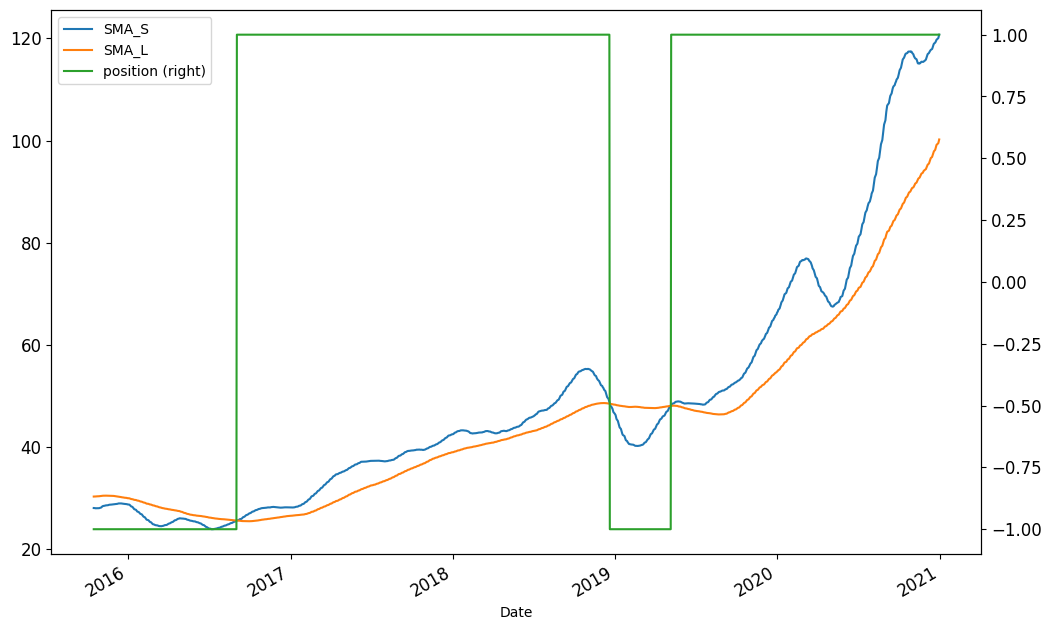

In [108]:
data.loc[:,["SMA_S", "SMA_L", "position"]].plot(figsize = (12,8), fontsize=12, secondary_y="position")

In [110]:
data["returns"] = np.log(data.Close.div(data.Close.shift(1)))
data["strategy"] = data.position.shift(1)*data["returns"]
data.dropna(inplace=True)
data

,Close,SMA_S,SMA_L,position,returns,strategy
Date,,,,,,
2015-10-19,27.932501,28.06795,30.335337,-1,0.006195,-0.006195
2015-10-20,28.442499,28.03820,30.344737,-1,0.018094,-0.018094
2015-10-21,28.440001,28.03955,30.354112,-1,-0.000088,0.000088
2015-10-22,28.875000,28.04085,30.363800,-1,0.015180,-0.015180
2015-10-23,29.770000,28.06050,30.372787,-1,0.030525,-0.030525
...,...,...,...,...,...,...
2020-12-23,130.960007,119.52140,98.809175,1,-0.007000,-0.007000
2020-12-24,131.970001,119.73700,99.158737,1,0.007683,0.007683
2020-12-28,136.690002,120.05660,99.494725,1,0.035141,0.035141


In [111]:
print("absolute performance is", data[["returns", "strategy"]].sum().apply(np.exp))

absolute performance is returns     4.817003
strategy    3.058637
dtype: float64


In [112]:
print("annualized return is", data[["returns", "strategy"]].mean() * 252)

annualized return is returns     0.302429
strategy    0.215060
dtype: float64


In [113]:
print("annualized risk is", data[["returns", "strategy"]].std() * np.sqrt(252))

annualized risk is returns     0.300869
strategy    0.301167
dtype: float64


In [114]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
data

,Close,SMA_S,SMA_L,position,returns,strategy,creturns,cstrategy
Date,,,,,,,,
2015-10-19,27.932501,28.06795,30.335337,-1,0.006195,-0.006195,1.006214,0.993824
2015-10-20,28.442499,28.03820,30.344737,-1,0.018094,-0.018094,1.024586,0.976004
2015-10-21,28.440001,28.03955,30.354112,-1,-0.000088,0.000088,1.024496,0.976090
2015-10-22,28.875000,28.04085,30.363800,-1,0.015180,-0.015180,1.040166,0.961385
2015-10-23,29.770000,28.06050,30.372787,-1,0.030525,-0.030525,1.072406,0.932482
...,...,...,...,...,...,...,...,...
2020-12-23,130.960007,119.52140,98.809175,1,-0.007000,-0.007000,4.717579,2.995506
2020-12-24,131.970001,119.73700,99.158737,1,0.007683,0.007683,4.753963,3.018608
2020-12-28,136.690002,120.05660,99.494725,1,0.035141,0.035141,4.923991,3.126571


<Axes: xlabel='Date'>

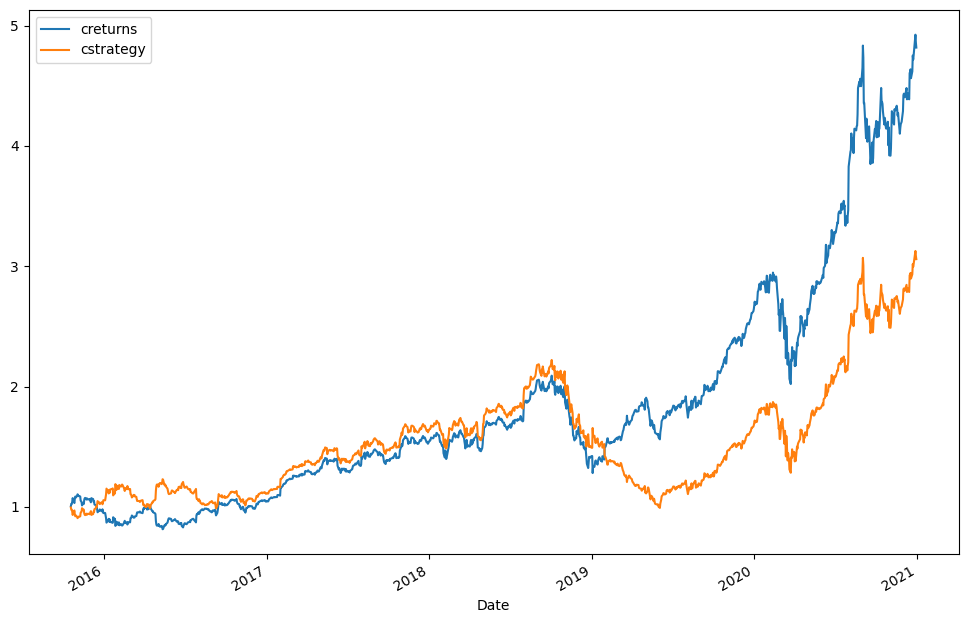

In [115]:
data[["creturns", "cstrategy"]].plot(figsize=(12,8))

In [116]:
outperf = data.cstrategy.iloc[-1] - data.creturns.iloc[-1]
outperf

-1.7583659885523963

In [146]:
#optimize the strategy
def run_strategy(SMA):
    data = aapl.loc["2015":"2020"].Close.to_frame()
    data["SMA_S"] = data.Close.rolling(int(SMA[0])).mean()
    data["SMA_L"] = data.Close.rolling(int(SMA[1])).mean()
    data.dropna(inplace=True)
    data["position"] = np.where(data["SMA_S"]>data["SMA_L"], 1, -1)
    data["returns"] = np.log(data.Close.div(data.Close.shift(1)))
    data["strategy"] = data.position.shift(1)*data["returns"]
    data.dropna(inplace=True)
    data.loc[:,["SMA_S", "SMA_L", "position"]].iplot(secondary_y="position")
    plt.figure()
    data.loc[:,["Close", "position"]].iplot(secondary_y="position")
    return data[["returns", "strategy"]].sum().apply(np.exp)

run_strategy([5,14])

returns     4.758719
strategy    9.907249
dtype: float64

<Figure size 640x480 with 0 Axes>

In [143]:
from scipy.optimize import brute
#optimize the strategy
def run_strategy(SMA):
    data = aapl.loc["2015":"2020"].Close.to_frame()
    data["SMA_S"] = data.Close.rolling(int(SMA[0])).mean()
    data["SMA_L"] = data.Close.rolling(int(SMA[1])).mean()
    data.dropna(inplace=True)
    data["position"] = np.where(data["SMA_S"]>data["SMA_L"], 1, -1)
    data["returns"] = np.log(data.Close.div(data.Close.shift(1)))
    data["strategy"] = data.position.shift(1)*data["returns"]
    data.dropna(inplace=True)
    # data.loc[:,["SMA_S", "SMA_L", "position"]].iplot(secondary_y="position")
    # plt.figure()
    # data.loc[:,["Close", "position"]].iplot(secondary_y="position")
    return -data[["returns", "strategy"]].sum().apply(np.exp)[-1]
brute(run_strategy, ((5,20,1), (10,100,1)))sat

array([ 5., 14.])

In [145]:
-run_strategy([5,14])

9.907248718576481

In [1]:
import requests

url = "https://apidojo-yahoo-finance-v1.p.rapidapi.com/stock/v4/get-statistics"

querystring = {"symbol":"TSLA","region":"US","lang":"en-US"}

headers = {
	"X-RapidAPI-Key": "551595c10emsh9ab76ccfb317820p1fa121jsnc738c9455698",
	"X-RapidAPI-Host": "apidojo-yahoo-finance-v1.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

print(response.json())

{'quoteSummary': {'result': [{'defaultKeyStatistics': {'maxAge': 1, 'priceHint': {'raw': 2, 'fmt': '2', 'longFmt': '2'}, 'enterpriseValue': {'raw': 728742756352, 'fmt': '728.74B', 'longFmt': '728,742,756,352'}, 'forwardPE': {'raw': 50.288063, 'fmt': '50.29'}, 'profitMargins': {'raw': 0.13658, 'fmt': '13.66%'}, 'floatShares': {'raw': 2709292276, 'fmt': '2.71B', 'longFmt': '2,709,292,276'}, 'sharesOutstanding': {'raw': 3169499904, 'fmt': '3.17B', 'longFmt': '3,169,499,904'}, 'sharesShort': {'raw': 95153797, 'fmt': '95.15M', 'longFmt': '95,153,797'}, 'sharesShortPriorMonth': {'raw': 88567444, 'fmt': '88.57M', 'longFmt': '88,567,444'}, 'sharesShortPreviousMonthDate': {'raw': 1681430400, 'fmt': '2023-04-14'}, 'dateShortInterest': {'raw': 1684108800, 'fmt': '2023-05-15'}, 'sharesPercentSharesOut': {'raw': 0.03, 'fmt': '3.00%'}, 'heldPercentInsiders': {'raw': 0.1306, 'fmt': '13.06%'}, 'heldPercentInstitutions': {'raw': 0.44891, 'fmt': '44.89%'}, 'shortRatio': {'raw': 0.77, 'fmt': '0.77'}, 'sh